<a href="https://colab.research.google.com/github/Lejla1502/Data-Science-Bootcamp/blob/master/Supervised_learning_building_Classification_and_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BUILDING CLASSIFICATION MODEL

In [2]:
import pandas as pd
import numpy as np

# import iris data using pandas
iris = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/iris.csv')

print(iris.shape)
iris.head(5)

(150, 5)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# check null value counts in iris data
iris.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [5]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.groupby('variety').size()


variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

In [7]:
iris.groupby('variety').mean()


,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,5.006,3.428,1.462,0.246
Versicolor,5.936,2.770,4.260,1.326
Virginica,6.588,2.974,5.552,2.026


In [8]:
#Split data into train and test

#In Machine Learning problems, we always need to split the dataset into train and test sets 
#in order to estimate the performance of the machine learning algorithm.


from sklearn import model_selection

# Split data into train and test
iris_train,iris_test = model_selection.train_test_split(iris,test_size=0.2)
print("Shape of the original iris data: ", iris.shape)
print("Shape of the iris train data = ", iris_train.shape)
print("Shape of the iris test data = ", iris_test.shape)

#once we split the data into train and test set you should reset your index
#because model expects that input data is inproper index format (0,1,2...)
#and when we split data it shuffles, shuffling index as well

#Resetting index for prediction time
iris_train = iris_train.reset_index(drop=True)
iris_test = iris_test.reset_index(drop=True)

Shape of the original iris data:  (150, 5)
Shape of the iris train data =  (120, 5)
Shape of the iris test data =  (30, 5)


In [9]:
#Feature selection

#It is essential to quality control the data that is being fed to the model.
#Feature Selection Methods:

#    Correlation coefficient
#    Variance threshold
#    Recursive Feature Elimination
#    LASSO regularization
#    Random Forest Importance


#Variance Threshold - Remove Low Var Features


#Variance threshold method removes features whose variance below a pre-defined cutoff value. 
#It is based on the notion that features that do not vary much within themselves have low predictive power. 
#The main weakness of variance threshold is that it does not consider the relationship of input features with the output feature.

#It should be noted that, before performing variance thresholding, all features should be standardized so they will have the same scale.
#And it is only applied to input features

iris_features = iris.drop('variety', axis=1)
iris_features.shape



(150, 4)

In [10]:
from sklearn.feature_selection import VarianceThreshold

iris_var = VarianceThreshold()

# Perform variance thresholding
iris_var.fit_transform(iris_features) #first calculates variance, then applies the treshold to variance
#by default, treshold is 0, so it will not drop any records from dataset

# Print the name and variance of each feature
for feature in zip(iris_features.columns, iris_var.variances_):
    print(feature)

('sepal.length', 0.6811222222222223)
('sepal.width', 0.1887128888888889)
('petal.length', 3.0955026666666665)
('petal.width', 0.5771328888888888)


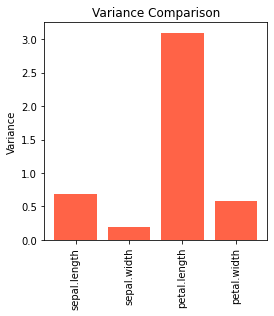

In [11]:
# Create a bar chart for visualizing the variances
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(4,4))
plt.bar(x=iris_features.columns, height=iris_var.variances_, color='tomato')
plt.xticks(rotation='vertical')
plt.ylabel('Variance')
plt.title('Variance Comparison')

plt.show()

In [12]:
#By default, VarianceThreshold removes only zero-variance features. Zero-variance feature means that the feature has the same value in all instances. 
#Suppose we want to eliminate features that have variance score below 0.2, we can specify threshold parameter.


# Create VarianceThreshold object to perform variance thresholding
selector = VarianceThreshold(threshold=0.2)

# Transform the dataset according to variance thresholding
iris_features_new = selector.fit_transform(iris_features)

# Print the results
print('Number of features before variance thresholding: {}'.format(iris_features.shape[1]))
print('Number of features after variance thresholding: {}'.format(iris_features_new.shape[1]))


#VarianceThreshold automatically eliminate features that have variance below 0.2. In this case, it removes sepal width, which has 0.188 variance.

Number of features before variance thresholding: 4
Number of features after variance thresholding: 3


In [13]:
#Split data into features and label

#by now, we split data horizontally, now we need to do it vertically
#if you want to build the model, you have to tell explicitly the model what are our inpout features 
#and what is our target variable

#define input and predict to columns
iris_features = ['sepal.length', 'petal.length', 'petal.width']
iris_labels = ['variety']

print('IRIS DATASET')
print("Features - " + str(iris_features))
print("Labels - " + str(iris_labels))

iris_train_features = iris_train[iris_features]
iris_train_label = iris_train[iris_labels]
print('✔ Train data split into features and labels')

iris_test_features = iris_test[iris_features]
iris_test_label = iris_test[iris_labels]
print('✔ Test data split into features and labels')


IRIS DATASET
Features - ['sepal.length', 'petal.length', 'petal.width']
Labels - ['variety']
✔ Train data split into features and labels
✔ Test data split into features and labels


In [14]:
#Decission tree  (classification model)
#it isalso used to solveregression task

from sklearn.tree import DecisionTreeClassifier

# create the model object
#we don't want to tree to split into high depth
#because it might cause overfitting
dt = DecisionTreeClassifier(max_depth=3) # max-depth controls the maximum depth of the tree

# fit the model on train data
#fit is going to learn the mapping between inputs and outputs
#that is why we specify features and label
dt.fit(iris_train_features, iris_train_label)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
#now that model has learned the rules from input features , we use this trainf model and predict it on our test data

#Predictions on the Test data
predictions_dt = dt.predict(iris_test_features)

#Putting the above predictions and probabilities together to create a readable df
#Creatuing the df on top of our predictions
iris_pred_label = pd.DataFrame(predictions_dt.reshape(len(predictions_dt),1))
iris_pred_label.rename(columns={0:'dt_prediction'}, inplace=True)
iris_pred_label.head(5)

,dt_prediction
0,Setosa
1,Versicolor
2,Virginica
3,Versicolor
4,Setosa


In [16]:
#To see if the model has predicted correctly

#Concat the predictions of linear regression to the test dataset
iris_test_pred = pd.concat([iris_test_label, iris_pred_label], axis=1)
iris_test_pred.head()

,variety,dt_prediction
0,Setosa,Setosa
1,Versicolor,Versicolor
2,Virginica,Virginica
3,Versicolor,Versicolor
4,Setosa,Setosa


In [19]:
#Model evaluation

#Accuracy of the model is the number of correct predictions a model has made

# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(iris_test_label, iris_pred_label)*100.0, "%")


accuracy is 96.66666666666667 %


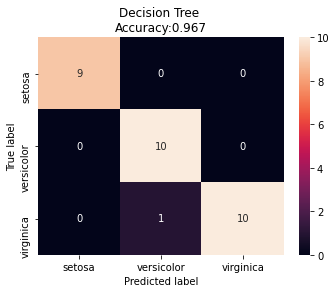

In [24]:
#Confusion Matrix: A table used to describe the performance of a classification model (or "classifier") on a set of test data 
#for which the true values are known.
import sklearn.metrics as metrics
import seaborn as sns


# Creates a confusion matrix
cm =metrics.confusion_matrix(iris_test_label, iris_pred_label) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Decision Tree \nAccuracy:{0:.3f}'.format(accuracy_score(iris_test_label, iris_pred_label)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()



#see how many correct and wrong predictions model has made
#diagonaliscorrect prediction (1. case 9, 2. case 10, 3. case10)
#in the third case there are 11 samples, out of which 10 were correctly predicted, and 1 was wrongly predicted

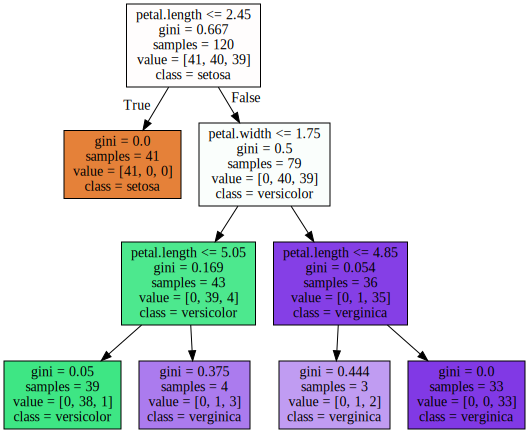

In [25]:
from sklearn import tree
import graphviz
# DOT data
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=iris_features,  
                                class_names=['setosa', 'versicolor', 'verginica'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

#gini means how pure is your node
#if values of gini =0 it means that node is pure and all the classes in node have been properly assinged to a single category
#samples is number of observation
#values- values of each class in the bucket/node

# BUILDING REGRESSION MODEL

In [26]:
#MEDV - Median value of owner-occupied homes in $1000's
#which is the value we are predicting

import pandas as pd
from sklearn import datasets

boston_raw = datasets.load_boston()

#boston_raw is of sklearn internal datatype. Converting it to pandas dataframe so we can analyze the data easier
boston = pd.DataFrame(boston_raw.data, columns=boston_raw.feature_names)
#target is the predict_to column, in this case it is medv and numerical in nature.
boston['MEDV'] = boston_raw.target

print(boston.shape)
boston.head(5)


(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
# check data summary
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [28]:
# check null value counts
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [29]:
boston.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [30]:
boston.groupby('MEDV').size()
#count values in a target variable

MEDV
5.0      2
5.6      1
6.3      1
7.0      2
7.2      3
        ..
46.7     1
48.3     1
48.5     1
48.8     1
50.0    16
Length: 229, dtype: int64

In [31]:
#SPLITTING THEDATA INTO TEST AND TRAINING

from sklearn import model_selection

#create train and test split
#what samples should we randomly choose from our dataset (random_state)

boston_train, boston_test = model_selection.train_test_split(boston,test_size=0.2,random_state=1)
print("Shape of the original boston data: ", boston.shape)
print("Shape of the boston train data = ", boston_train.shape)
print("Shape of the boston test data = ", boston_test.shape)

#Resetting index for prediction time
boston_train = boston_train.reset_index(drop=True)
boston_test = boston_test.reset_index(drop=True)

Shape of the original boston data:  (506, 14)
Shape of the boston train data =  (404, 14)
Shape of the boston test data =  (102, 14)


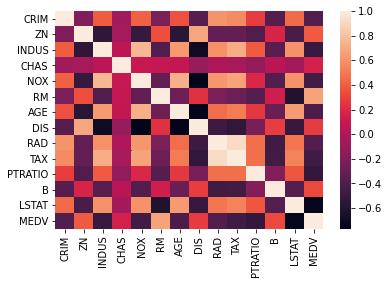

In [32]:
#FEATURE SELECTION

#In the boston dataset, are there any columns that are not useful or have very low correlation?

#A correlation value can range between -1 to 1.
#Value closer to -1 means high negative correlation between two variables
#Value closer to +1 means high positive correlation between two variables
#Value closer to 0 means no or very low correlation between two variables

import seaborn as sns

boston_corr_matrix = boston_train.corr()
sns.heatmap(data=boston_corr_matrix, annot=False)

In [33]:
#Since MEDV is our predict column, we want to pick features which have a positive and negative correlation with MEDV. 
#Adding in columns which have a low or non-existent correlation would add to our 'Curse of Dimensionality' issue.

#We need to filter out the highly positive correlated and highly negative correlated features
#neg cor.  has a goodrelationship withinput and the output

#values closer to 0 are notreally relevant

#printing all the correlations to MEDV in descending order
boston_corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.670963
ZN         0.387510
B          0.329432
DIS        0.280202
CHAS       0.156214
CRIM      -0.392849
RAD       -0.393258
AGE       -0.413612
NOX       -0.449965
TAX       -0.464379
INDUS     -0.498042
PTRATIO   -0.524866
LSTAT     -0.741302
Name: MEDV, dtype: float64

In [34]:
#For this, let us pick 2 variables with high positive correlation (RM,ZN) and 2 with high negative correlation (PTRATIO, LSSTAT).

#We will do this in the data pipeline section to ensure the same processes are done over the train and test datasets.


#After selection, we need to split data into features and label


#define input and predict to ccolumns
boston_features = ['RM', 'ZN', 'PTRATIO', 'LSTAT']
boston_labels = ['MEDV']

print('BOSTON DATASET')
print("Features - " + str(boston_features))
print("Labels - " + str(boston_labels))

boston_train_features = boston_train[boston_features]
boston_train_labels = boston_train[boston_labels]
print('✔ Train data split into features and labels')

boston_test_features = boston_test[boston_features]
boston_test_labels = boston_test[boston_labels]
print('✔ Test data split into features and labels')

BOSTON DATASET
Features - ['RM', 'ZN', 'PTRATIO', 'LSTAT']
Labels - ['MEDV']
✔ Train data split into features and labels
✔ Test data split into features and labels


In [35]:
#MODEL CREATION

from sklearn.linear_model import LinearRegression

# create the model object
lr = LinearRegression()

# fit the model on train data
lr.fit(boston_train_features, boston_train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
#Predictions on the Test data
predictions_lr = lr.predict(boston_test_features)

#Putting the above predictions and probabilities together to create a readable df
lr_df = pd.DataFrame(predictions_lr.reshape(len(predictions_lr),1))
lr_df.rename(columns={0:'lr_prediction'}, inplace=True)
lr_df.head(5)

,lr_prediction
0,27.829478
1,28.173114
2,18.600315
3,23.346711
4,18.892405


In [37]:
#Concat the predictions of linear regression to the test dataset
boston_test_prediction = pd.concat([boston_test_labels, lr_df], axis=1)
boston_test_prediction.head(5)

,MEDV,lr_prediction
0,28.2,27.829478
1,23.9,28.173114
2,16.6,18.600315
3,22.0,23.346711
4,20.8,18.892405


In [38]:
# interpreting coefficients
# prints y-intercept
print(lr.intercept_)

# prints the coefficient
print(lr.coef_)

[24.28507347]
[[ 3.82478846e+00 -2.96289190e-03 -9.82968918e-01 -5.93249451e-01]]


In [39]:
#MODEL EVALUATION

# import metrics library
from sklearn import metrics

# print result of MAE
print(metrics.mean_absolute_error(boston_test_prediction['MEDV'], boston_test_prediction['lr_prediction']))

#print result of MSE
print(metrics.mean_squared_error(boston_test_prediction['MEDV'], boston_test_prediction['lr_prediction']))

#print result of RMSE
print(np.sqrt(metrics.mean_squared_error(boston_test_prediction['MEDV'], boston_test_prediction['lr_prediction'])))

4.28125545229612
29.97447785621386
5.474895237008089
